<h1> Ghouls, Goblins, and Ghosts... Boo! 

<span style="font-size: 1.25em;"> - **`Kaggle Challenge` : Monsters classification based on their characteristics.**</span>

![illustration](https://storage.googleapis.com/kaggle-competitions/kaggle/5708/media/halloween-660x.png)

<h2> Goal

The goal is to predict the type of a monster based on its characteristics using machine learning algorithms. 

First, we will load the data, run a quick exploratory data analysis and then use classification algorithms such as Logistic regression, gradient boosting or random forest for instance. 

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h2> Load the data

The dataset is available on Kaggle [here](https://www.kaggle.com/c/ghouls-goblins-and-ghosts-boo).

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [5]:
data.shape

(371, 7)

<h2> Exploratory Data Analysis

<h3> Data Cleaning

In [6]:
# Check for NaN values

data.isna().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [8]:
# Dummies of categorical feature 'color'

data = pd.concat([data, pd.get_dummies(data['color'])], axis=1)
data.head()



,id,bone_length,rotting_flesh,hair_length,has_soul,color,type,black,blood,blue,clear,green,white
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul,0,0,0,1,0,0
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin,0,0,0,0,1,0
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul,1,0,0,0,0,0
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul,1,0,0,0,0,0
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost,0,0,0,0,1,0


In [9]:
data['type'].value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

The 3 classes are quite balanced. 

In [10]:
# Get exploitable target : 0 - Ghost , 1 - Goblin, 2 - Ghoul

In [11]:
def get_target(x):
    if x == 'Ghost':
        return 0
    elif x == 'Goblin':
        return 1
    elif x == 'Ghoul':
        return 2

In [12]:
# Apply on 'type' column

data['target'] = data['type'].apply(lambda x: get_target(x))

In [13]:
data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type,black,blood,blue,clear,green,white,target
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul,0,0,0,1,0,0,2
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin,0,0,0,0,1,0,1
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul,1,0,0,0,0,0,2
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul,1,0,0,0,0,0,2
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost,0,0,0,0,1,0,0


In [14]:
data_study = data.drop(['type','color'], axis=1)
data_study.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,black,blood,blue,clear,green,white,target
0,0,0.354512,0.350839,0.465761,0.781142,0,0,0,1,0,0,2
1,1,0.575560,0.425868,0.531401,0.439899,0,0,0,0,1,0,1
2,2,0.467875,0.354330,0.811616,0.791225,1,0,0,0,0,0,2
3,4,0.776652,0.508723,0.636766,0.884464,1,0,0,0,0,0,2
4,5,0.566117,0.875862,0.418594,0.636438,0,0,0,0,1,0,0


<h3> Data Analysis

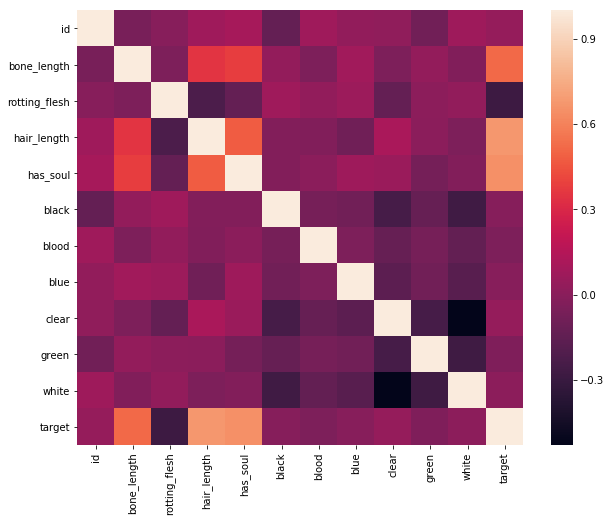

In [15]:
plt.figure(figsize=(10,8))

sns.heatmap(data_study.corr())

plt.show()

In [16]:
# Plot of bone_length and has_soul

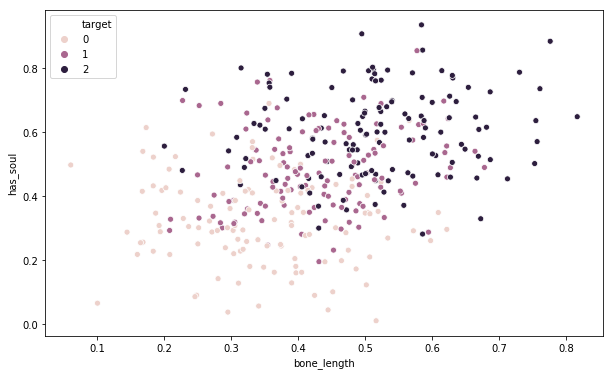

In [17]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='bone_length', y='has_soul', data=data, hue='target')

plt.show()

In [18]:
# Distribution of the colors

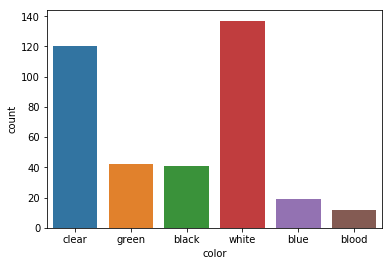

In [19]:
plt.figure()

sns.countplot(x=data['color'])

plt.show()

In [20]:
# Distribution of color for each type

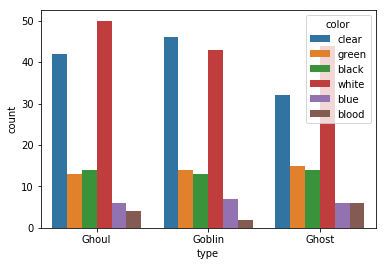

In [21]:
plt.figure()

sns.countplot(x='type', hue='color', data=data)

plt.show()

With those countplots, we can already see that the color is not a factor that will help us figure out what type is the monster. Indeed, the color 'clear' and 'white' are quite present in all 3 classes. 

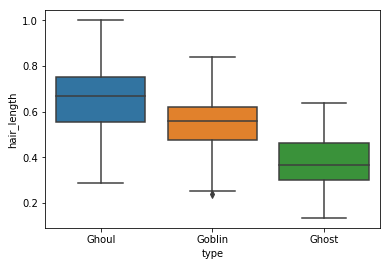

In [22]:
plt.figure()

sns.boxplot(x='type', y='hair_length', data=data)

However, the feature hair_length can be more effective to define the type of monster. 

<h2> Machine Learning Algorithms

<h3> Splitting data
    

In [23]:
y = data_study['target']
X = data_study.drop('target', axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h3> Logistic Regression

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred_lr = lr.predict(X_test)

In [28]:
lr.score(X_test, y_test)

0.76

<h3> Random Forest

In [29]:
rf = RandomForestClassifier()

In [30]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
y_pred_rf = rf.predict(X_test)

In [32]:
rf.score(X_test, y_test)

0.8

In [33]:
rf.feature_importances_

array([0.10296007, 0.17141646, 0.15665431, 0.27408579, 0.23906237,
       0.0110746 , 0.00337211, 0.00680042, 0.01213473, 0.00905223,
       0.0133869 ])

<h3> Gradient Boosting

In [34]:
gb = GradientBoostingClassifier()

In [35]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [36]:
gb.score(X_test, y_test)

0.76

<h3> XGBoost

In [37]:
xgb1 = xgb.XGBClassifier()
xgb2 = xgb.XGBClassifier()

 
xgb1.fit(X_train, y_train)
xgb1.score(X_test, y_test)

0.7466666666666667

<h2> Feature engineering and score comparison

<h3> Multiplication of 2 features

Based on the results of the feature importances with Random Forest, we will try to build new features in order to see if it improves the accuracy score. We will add 2 columns in our dataframe :
- bone_length * rotting_flesh
- hair_length * has_soul 

In [38]:
data_study['bone_rott'] = data_study['bone_length'] * data_study['rotting_flesh']

In [39]:
data_study['hair_soul'] = data_study['hair_length'] * data_study['has_soul']

Let's now split our data again to see if there are any improvements:

In [40]:
y_f = data_study['target']
X_f = data_study.drop('target', axis=1)

In [41]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, random_state=0)

<h4> Test and comparision between Random Forest, Logistic Regression and Gradient Boosting

In [42]:
# Comparison between Random Forest results and Logistic Regression 

# Random Forest
rf2 = RandomForestClassifier()
rf2.fit(X_train_f, y_train_f)
print(f" Accuracy score using Random Forest without feature engineering : {round(rf.score(X_test, y_test),2)}")
print(f" Accuracy score using Random Forest with feature engineering : {round(rf2.score(X_test_f, y_test_f),2)}")

# Logistic Regression
lr2 = LogisticRegression()
lr2.fit(X_train_f, y_train_f)
print(f" Accuracy score using Logistic Regression without FE : {round(lr.score(X_test, y_test),2)}")
print(f" Accuracy score using Logistic Regression with FE: {round(lr2.score(X_test_f, y_test_f),2)}")

# Gradient Boosting
gb2 = GradientBoostingClassifier()
gb2.fit(X_train_f, y_train_f)
print(f" Accuracy score using Gradient Boosting without FE : {round(gb.score(X_test, y_test),2)}")
print(f" Accuracy score using Gradient Boosting with FE: {round(gb2.score(X_test_f, y_test_f),2)}")

 Accuracy score using Random Forest without feature engineering : 0.8
 Accuracy score using Random Forest with feature engineering : 0.76
 Accuracy score using Logistic Regression without FE : 0.76
 Accuracy score using Logistic Regression with FE: 0.76
 Accuracy score using Gradient Boosting without FE : 0.76
 Accuracy score using Gradient Boosting with FE: 0.83


<h3> Features squared

In [43]:
data_study['bone_squared'] = data_study['bone_length'] * data_study['bone_length'] 

In [44]:
data_study['hair_squared'] = data_study['hair_length'] * data_study['hair_length']

In [45]:
data_study['flesh_squared'] = data_study['rotting_flesh'] * data_study['rotting_flesh'] 

In [46]:
data_study['soul_squared'] = data_study['has_soul'] * data_study['has_soul']

<h4> Test and comparison with the new features

In [47]:
y_f2 = data_study['target']
X_f2 = data_study.drop('target', axis=1)

In [48]:
X_train_f2, X_test_f2, y_train_f2, y_test_f2 = train_test_split(X_f2, y_f2, test_size=0.2, random_state=0)

In [49]:
# Comparison between Random Forest results and Logistic Regression 

# Random Forest
rf3 = RandomForestClassifier()
rf3.fit(X_train_f2, y_train_f2)
print(f" Accuracy score using Random Forest with previous feature engineering : {round(rf2.score(X_test_f, y_test_f),2)}")
print(f" Accuracy score using Random Forest with new feature engineering : {round(rf3.score(X_test_f2, y_test_f2),2)}")

# Logistic Regression
lr3 = LogisticRegression()
lr3.fit(X_train_f2, y_train_f2)
print(f" Accuracy score using Logistic Regression with previous FE : {round(lr2.score(X_test_f, y_test_f),2)}")
print(f" Accuracy score using Logistic Regression with new FE: {round(lr3.score(X_test_f2, y_test_f2),2)}")

# Gradient Boosting
gb3 = GradientBoostingClassifier()
gb3.fit(X_train_f2, y_train_f2)
print(f" Accuracy score using Gradient Boosting with previous FE : {round(gb2.score(X_test_f, y_test_f),2)}")
print(f" Accuracy score using Gradient Boosting with new FE: {round(gb3.score(X_test_f2, y_test_f2),2)}")

 Accuracy score using Random Forest with previous feature engineering : 0.76
 Accuracy score using Random Forest with new feature engineering : 0.77
 Accuracy score using Logistic Regression with previous FE : 0.76
 Accuracy score using Logistic Regression with new FE: 0.77
 Accuracy score using Gradient Boosting with previous FE : 0.83
 Accuracy score using Gradient Boosting with new FE: 0.83


<h3> Features exponential

In [50]:
data_study['bone_exp'] = data_study['bone_length'].apply(lambda x: np.exp(x))
data_study['hair_length'] = data_study['hair_length'].apply(lambda x: np.exp(x))
data_study['rotting_flesh'] = data_study['rotting_flesh'].apply(lambda x: np.exp(x))
data_study['has_soul'] = data_study['has_soul'].apply(lambda x: np.exp(x))

<h4> Test and comparison with new features

In [51]:
y_f3 = data_study['target']
X_f3 = data_study.drop('target', axis=1)

In [52]:
X_train_f3, X_test_f3, y_train_f3, y_test_f3 = train_test_split(X_f3, y_f3, test_size=0.2, random_state=0)

In [53]:
# Comparison between Random Forest results and Logistic Regression 

# Random Forest
rf4 = RandomForestClassifier()
rf4.fit(X_train_f3, y_train_f3)
print(f" Accuracy score using Random Forest with previous feature engineering : {round(rf3.score(X_test_f2, y_test_f2),2)}")
print(f" Accuracy score using Random Forest with new feature engineering : {round(rf4.score(X_test_f3, y_test_f3),2)}")

# Logistic Regression
lr4 = LogisticRegression()
lr4.fit(X_train_f3, y_train_f3)
print(f" Accuracy score using Logistic Regression with previous FE : {round(lr3.score(X_test_f2, y_test_f2),2)}")
print(f" Accuracy score using Logistic Regression with new FE: {round(lr4.score(X_test_f3, y_test_f3),2)}")

# Gradient Boosting
gb4 = GradientBoostingClassifier()
gb4.fit(X_train_f3, y_train_f3)
print(f" Accuracy score using Gradient Boosting with previous FE : {round(gb3.score(X_test_f2, y_test_f2),2)}")
print(f" Accuracy score using Gradient Boosting with new FE: {round(gb4.score(X_test_f3, y_test_f3),2)}")

 Accuracy score using Random Forest with previous feature engineering : 0.77
 Accuracy score using Random Forest with new feature engineering : 0.8
 Accuracy score using Logistic Regression with previous FE : 0.77
 Accuracy score using Logistic Regression with new FE: 0.73
 Accuracy score using Gradient Boosting with previous FE : 0.83
 Accuracy score using Gradient Boosting with new FE: 0.83


<h2> Focusing on Gradient Boosting

<h3> GridSearch on Gradient Boosting

In [54]:
param_grid = {'max_depth': [2, 3, 4, 5],
              'learning_rate' : [0.01, 0.025, 0.05, 0.075, 0.1],
              'n_estimators' : [20, 50, 100, 120, 150]}

In [55]:
grid2 = GridSearchCV(gb3, param_grid)

In [56]:
grid2.fit(X_train_f3, y_train_f3)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...ge=None,
         

In [57]:
y_pred_f3 = grid2.predict(X_test_f3)

In [58]:
accuracy_score(y_test_f3, y_pred_f3)

0.7866666666666666

## Results

With feature engineering, I managed to achieve an accuracy of around **82%** using `Gradient Boosting`.     